In [5]:
import pandas as pd
%matplotlib inline

In [6]:
user_hist = pd.read_csv('multivar_lstm/data/sample.csv')
user_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15823019 entries, 0 to 15823018
Data columns (total 5 columns):
USER_ID      int64
MOVIE_ID     int64
DURATION     int64
WATCH_DAY    int64
WATCH_SEQ    int64
dtypes: int64(5)
memory usage: 603.6 MB


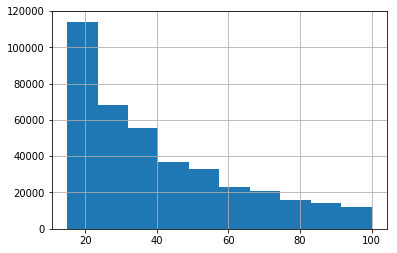

In [7]:
s = user_hist.USER_ID.value_counts()
s.hist()

In [8]:
test_hist = pd.read_csv('multivar_lstm/data/KISA_TBC_QUESTION.csv')
test_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982000 entries, 0 to 981999
Data columns (total 5 columns):
USER_ID      982000 non-null int64
MOVIE_ID     982000 non-null int64
DURATION     982000 non-null int64
WATCH_DAY    982000 non-null int64
WATCH_SEQ    982000 non-null int64
dtypes: int64(5)
memory usage: 37.5 MB


In [9]:
test_hist['USER_ID'] = test_hist['USER_ID'] + 1000000

In [10]:
user_hist = pd.concat([user_hist, test_hist],axis=0)
user_hist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16805019 entries, 0 to 981999
Data columns (total 5 columns):
USER_ID      int64
MOVIE_ID     int64
DURATION     int64
WATCH_DAY    int64
WATCH_SEQ    int64
dtypes: int64(5)
memory usage: 769.3 MB


In [11]:
user_hist.USER_ID.value_counts()

343077     100
81562      100
367182     100
108787     100
307722     100
317032     100
42201      100
232791     100
55018      100
122471     100
345386     100
299883     100
197343     100
320598     100
42205      100
285072     100
201625     100
252551     100
211774     100
142857     100
282365     100
105423     100
124665     100
62059      100
1725       100
269741     100
344606     100
111530     100
27918      100
45526      100
          ... 
1025157     10
1003559     10
1051393     10
1067785     10
1084177     10
1058677     10
1034489     10
1018097     10
1041550     10
1036340     10
1003556     10
1086431     10
1063385     10
1053647     10
1070023     10
1023722     10
1008798     10
1079761     10
1007346     10
1001705     10
1025158     10
1096137     10
1075069     10
1034502     10
1018126     10
1001750     10
1084142     10
1067766     10
1051390     10
1077778     10
Name: USER_ID, Length: 491387, dtype: int64

In [12]:
sub = user_hist[user_hist['USER_ID'] == 1].sort_values(['WATCH_DAY', 'WATCH_SEQ'])
inseq = 10
temp_list = []
temp_col_list = []
for i in range(inseq):
    temp_col_list.append('MOVIE_ID_t'+str(i))
    temp_list.append(sub['MOVIE_ID'].shift(-1*i))

df = pd.concat(temp_list, axis=1)
df.columns = temp_col_list
df.dropna(inplace=True)
df = df.astype(int).astype(str)
df.values.tolist()

[['7691',
  '7691',
  '7691',
  '4949',
  '4949',
  '6024',
  '6024',
  '6024',
  '3267',
  '3843'],
 ['7691',
  '7691',
  '4949',
  '4949',
  '6024',
  '6024',
  '6024',
  '3267',
  '3843',
  '4094'],
 ['7691',
  '4949',
  '4949',
  '6024',
  '6024',
  '6024',
  '3267',
  '3843',
  '4094',
  '5787'],
 ['4949',
  '4949',
  '6024',
  '6024',
  '6024',
  '3267',
  '3843',
  '4094',
  '5787',
  '7450'],
 ['4949',
  '6024',
  '6024',
  '6024',
  '3267',
  '3843',
  '4094',
  '5787',
  '7450',
  '1448'],
 ['6024',
  '6024',
  '6024',
  '3267',
  '3843',
  '4094',
  '5787',
  '7450',
  '1448',
  '2770'],
 ['6024',
  '6024',
  '3267',
  '3843',
  '4094',
  '5787',
  '7450',
  '1448',
  '2770',
  '5787'],
 ['6024',
  '3267',
  '3843',
  '4094',
  '5787',
  '7450',
  '1448',
  '2770',
  '5787',
  '845'],
 ['3267',
  '3843',
  '4094',
  '5787',
  '7450',
  '1448',
  '2770',
  '5787',
  '845',
  '2621'],
 ['3843',
  '4094',
  '5787',
  '7450',
  '1448',
  '2770',
  '5787',
  '845',
  '2621',
  '1

In [13]:
import time

In [14]:
%%time
result = []
for i, index in enumerate(user_hist['USER_ID'].value_counts().index):
    st = time.time()
    sub = user_hist[user_hist['USER_ID'] == index].sort_values(['WATCH_DAY', 'WATCH_SEQ'])
    inseq = 10
    temp_list = []
    temp_col_list = []
    for k in range(inseq):
        temp_col_list.append('MOVIE_ID_t'+str(k))
        temp_list.append(sub['MOVIE_ID'].shift(-1*k))

    df = pd.concat(temp_list, axis=1)
    df.columns = temp_col_list
    df.dropna(inplace=True)
    df = df.astype(int).astype(str)
    result.extend(df.values.tolist())
    et = time.time()
    
    if i % 1000 == 0:
        print(i, index, (et-st)*1000)

0 343077 23.200035095214844
1000 374092 22.92919158935547
2000 95728 22.717714309692383
3000 382373 22.797346115112305
4000 87319 22.886037826538086
5000 163195 23.0712890625
6000 244605 23.20384979248047
7000 87268 22.93992042541504
8000 131885 22.978544235229492
9000 192712 23.224592208862305
10000 196313 22.430896759033203
11000 113273 22.551774978637695
12000 343940 23.072481155395508
13000 134229 23.036479949951172
14000 256598 22.835969924926758
15000 104049 23.418188095092773
16000 140704 22.806644439697266
17000 21313 23.409128189086914
18000 101683 22.873401641845703
19000 139721 22.99046516418457
20000 55530 23.154735565185547
21000 340681 22.759199142456055
22000 78213 22.960424423217773
23000 70569 23.424863815307617
24000 264749 22.77827262878418
25000 379968 23.142099380493164
26000 389910 22.762298583984375
27000 387383 22.64857292175293
28000 127516 22.77684211730957
29000 157897 22.841691970825195
30000 297579 22.752761840820312
31000 73461 22.500276565551758
32000 148

258000 376661 22.53890037536621
259000 371509 22.468090057373047
260000 143431 22.687673568725586
261000 316758 23.40555191040039
262000 369433 22.897005081176758
263000 64098 23.106813430786133
264000 177011 23.431062698364258
265000 94464 22.52674102783203
266000 129086 22.379636764526367
267000 311237 22.541284561157227
268000 355806 22.681236267089844
269000 365408 22.396087646484375
270000 126358 22.02630043029785
271000 339485 22.488117218017578
272000 302041 21.997928619384766
273000 190384 22.027015686035156
274000 196461 22.347450256347656
275000 167747 22.269725799560547
276000 205422 22.05824851989746
277000 134811 23.137807846069336
278000 326444 24.5816707611084
279000 210871 25.516510009765625
280000 45235 22.494792938232422
281000 242614 22.25184440612793
282000 289724 21.985292434692383
283000 209078 22.12071418762207
284000 119488 22.24898338317871
285000 19427 22.433042526245117
286000 173055 22.057056427001953
287000 248668 22.06254005432129
288000 244662 22.52626419

In [15]:
len(result)

12382536

In [16]:
from gensim.models import Word2Vec

In [17]:
%%time
model = Word2Vec(result,window=4,min_count=0,sg=1)

CPU times: user 39min 39s, sys: 2.48 s, total: 39min 42s
Wall time: 13min 39s


In [33]:
vec = user_hist.MOVIE_ID.value_counts().index.astype(str).tolist()
vec

['5026',
 '3851',
 '2608',
 '5775',
 '7322',
 '1330',
 '4130',
 '7382',
 '824',
 '2420',
 '5375',
 '28',
 '2340',
 '1068',
 '6908',
 '4820',
 '3987',
 '8084',
 '6428',
 '3956',
 '3549',
 '4129',
 '5694',
 '5746',
 '4078',
 '5382',
 '2051',
 '1645',
 '4009',
 '7691',
 '7285',
 '2119',
 '1400',
 '6411',
 '4426',
 '4959',
 '2493',
 '1371',
 '4949',
 '603',
 '6561',
 '3212',
 '583',
 '884',
 '1720',
 '2929',
 '5657',
 '3612',
 '1887',
 '4023',
 '7812',
 '4248',
 '1448',
 '406',
 '1486',
 '7870',
 '6127',
 '3262',
 '7824',
 '8032',
 '620',
 '6816',
 '2492',
 '5967',
 '4802',
 '3401',
 '8158',
 '29',
 '5726',
 '753',
 '1984',
 '2127',
 '762',
 '5162',
 '4262',
 '5767',
 '1841',
 '280',
 '1904',
 '5097',
 '4388',
 '3933',
 '8210',
 '2770',
 '2181',
 '641',
 '2658',
 '7607',
 '7760',
 '3092',
 '1844',
 '4501',
 '5905',
 '5354',
 '8046',
 '7718',
 '5227',
 '845',
 '4606',
 '3139',
 '2621',
 '2540',
 '5234',
 '829',
 '7029',
 '1845',
 '401',
 '3477',
 '6486',
 '1092',
 '6849',
 '6885',
 '6035',


In [34]:
model.wv[vec].shape

(7660, 100)

In [19]:
model.wv.most_similar(positive=['5375'],topn=10)

[('3987', 0.7373523116111755),
 ('28', 0.7197299599647522),
 ('1887', 0.6573820114135742),
 ('406', 0.6450786590576172),
 ('7029', 0.6420729160308838),
 ('6549', 0.6344334483146667),
 ('6046', 0.6313242316246033),
 ('5738', 0.6312358975410461),
 ('8075', 0.6215146780014038),
 ('327', 0.6209464073181152)]

In [35]:
model.save('multivar_lstm/movie_w2v_final_model.model')

In [37]:
!ls multivar_lstm/

data			 models.py
final_model.h5		 movie_w2v_final_model.model
lstm_data_generator.py	 movie_w2v_mincount_model.model
lstm_dataset		 nohup.out
make_label.py		 __pycache__
make_lstm_dataset.py	 scaled_KISA_TBC_QUESTION.csv
make_movie_w2v_model.py  split_data
model			 split_large_file.py
model.h5		 train.py


In [44]:
movie_meta = pd.read_csv('../../sample_movie_meta.tsv',sep='\t')
movie_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8259 entries, 0 to 8258
Data columns (total 3 columns):
MOVIE_ID         8259 non-null int64
TITLE            8259 non-null object
RELEASE_MONTH    8259 non-null int64
dtypes: int64(2), object(1)
memory usage: 193.6+ KB


In [48]:
movie_meta.loc[541]

MOVIE_ID            541
TITLE               광시곡
RELEASE_MONTH    201612
Name: 541, dtype: object

In [49]:
movie_meta.loc[396]

MOVIE_ID            396
TITLE                시선
RELEASE_MONTH    201612
Name: 396, dtype: object

In [55]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [50]:
vocab = list(model.wv.vocab)
X = model[vocab]

/Users/1003874/anaconda/envs/nlp/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [53]:
%%time
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)


In [54]:
visual_df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])

/Users/1003874/anaconda/envs/nlp/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


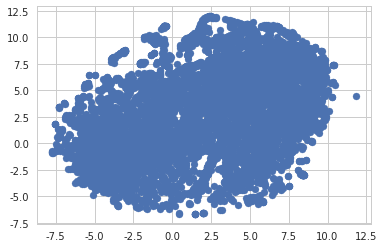

In [63]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(visual_df['x'], visual_df['y'])

In [97]:
output_df = pd.DataFrame(X)
output_df = output_df
output_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7542 entries, 0 to 7541
Data columns (total 100 columns):
0     7542 non-null float32
1     7542 non-null float32
2     7542 non-null float32
3     7542 non-null float32
4     7542 non-null float32
5     7542 non-null float32
6     7542 non-null float32
7     7542 non-null float32
8     7542 non-null float32
9     7542 non-null float32
10    7542 non-null float32
11    7542 non-null float32
12    7542 non-null float32
13    7542 non-null float32
14    7542 non-null float32
15    7542 non-null float32
16    7542 non-null float32
17    7542 non-null float32
18    7542 non-null float32
19    7542 non-null float32
20    7542 non-null float32
21    7542 non-null float32
22    7542 non-null float32
23    7542 non-null float32
24    7542 non-null float32
25    7542 non-null float32
26    7542 non-null float32
27    7542 non-null float32
28    7542 non-null float32
29    7542 non-null float32
30    7542 non-null float32
31    7542 non-null floa

In [91]:
movie_meta['MOVIE_ID'] = movie_meta['MOVIE_ID'].astype(str)

In [92]:
movie_meta.set_index('MOVIE_ID',inplace=True)

In [95]:
op_df  = pd.DataFrame(index=vocab)
op_df['movie_name'] = movie_meta['TITLE'].apply(lambda x: x.replace('\t',' '))
op_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7542 entries, 3368 to 7804
Data columns (total 1 columns):
movie_name    7542 non-null object
dtypes: object(1)
memory usage: 117.8+ KB


In [96]:
op_df.to_csv('movie_embedding_optional.tsv',sep='\t',index=False,header=False)

In [98]:
output_df.to_csv('movie_embedding.tsv',sep='\t',index=False,header=False)

In [104]:
390000/1000

390.0